In [1]:
import os
# no nvlink
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import json

with open('/data/students/juan/train/grocery-item-segmentation-yolo/dataset/annotations/instances_train.json') as file:
    annotations = json.load(file)

print(annotations.keys())
print(annotations['categories'])
category_names = sorted([{'id': ac['id'], 'name': ac['name']} for ac in annotations['categories']], key=lambda x: x['id'])
print(category_names)
print(len(category_names))
print([ac['name'] for ac in category_names])

dict_keys(['images', 'categories', 'annotations'])
[{'id': 16, 'name': 'pineapple juice', 'supercategory': '', 'color': '#d6504a', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'category_id', 'id': 18, 'name': '18'}, {'supercategory': 'type', 'id': 24, 'name': 'GreenCross Ethyl Alcohol'}, {'id': 19, 'name': 'pink_shampoo', 'supercategory': '', 'color': '#35e071', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'type', 'id': 22, 'name': 'toothpaste'}, {'id': 8, 'name': 'garlic', 'supercategory': '', 'color': '#b059f0', 'metadata': {}, 'keypoint_colors': []}, {'id': 14, 'name': 'peanut_butter', 'supercategory': '', 'color': '#dccd1c', 'metadata': {}, 'keypoint_colors': []}, {'id': 6, 'name': 'Cooking_oil', 'supercategory': '', 'color': '#10d39c', 'metadata': {}, 'creator': 'jeryl4913', 'keypoint_colors': []}, {'id': 20, 'name': '20', 'supercategory': '', 'color': '#613fe3', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'type', 'id': 1, 'name': 'bottled_s

Current running training script with YOLO8-nano.

`yolo task=segment mode=train model=yolov8n-seg.pt data=config.yaml epochs=1 imgsz=640`

Current running validation script with YOLO8-nano.

`yolo task=segment mode=val model=yolov8n-seg.pt data=config.yaml epochs=1 imgsz=640`

Current running inference script with YOLO8-nano.

`yolo task=segment mode=predict model=yolov8n-seg.pt source=/data/detection/grocery/dataset/images/val`

References:

* https://docs.ultralytics.com/datasets/segment/#port-or-convert-label-formats
* https://github.com/ultralytics/JSON2YOLO/blob/main/general_json2yolo.py
* https://stackoverflow.com/questions/76651217/how-to-use-one-json-label-file-for-all-the-training-images-for-yolo-nas 
* https://github.com/ultralytics/ultralytics/issues/11268


# Trial 1

YOLO-V8 with 100 epochs, default settings.

In [2]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=config.yaml epochs=100 imgsz=640

New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

In [ ]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,262,744 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070049.jpg: ignoring corrupt image/label: negative label values [-0.0024665]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070056.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.001284]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0047395]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070064.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0024115

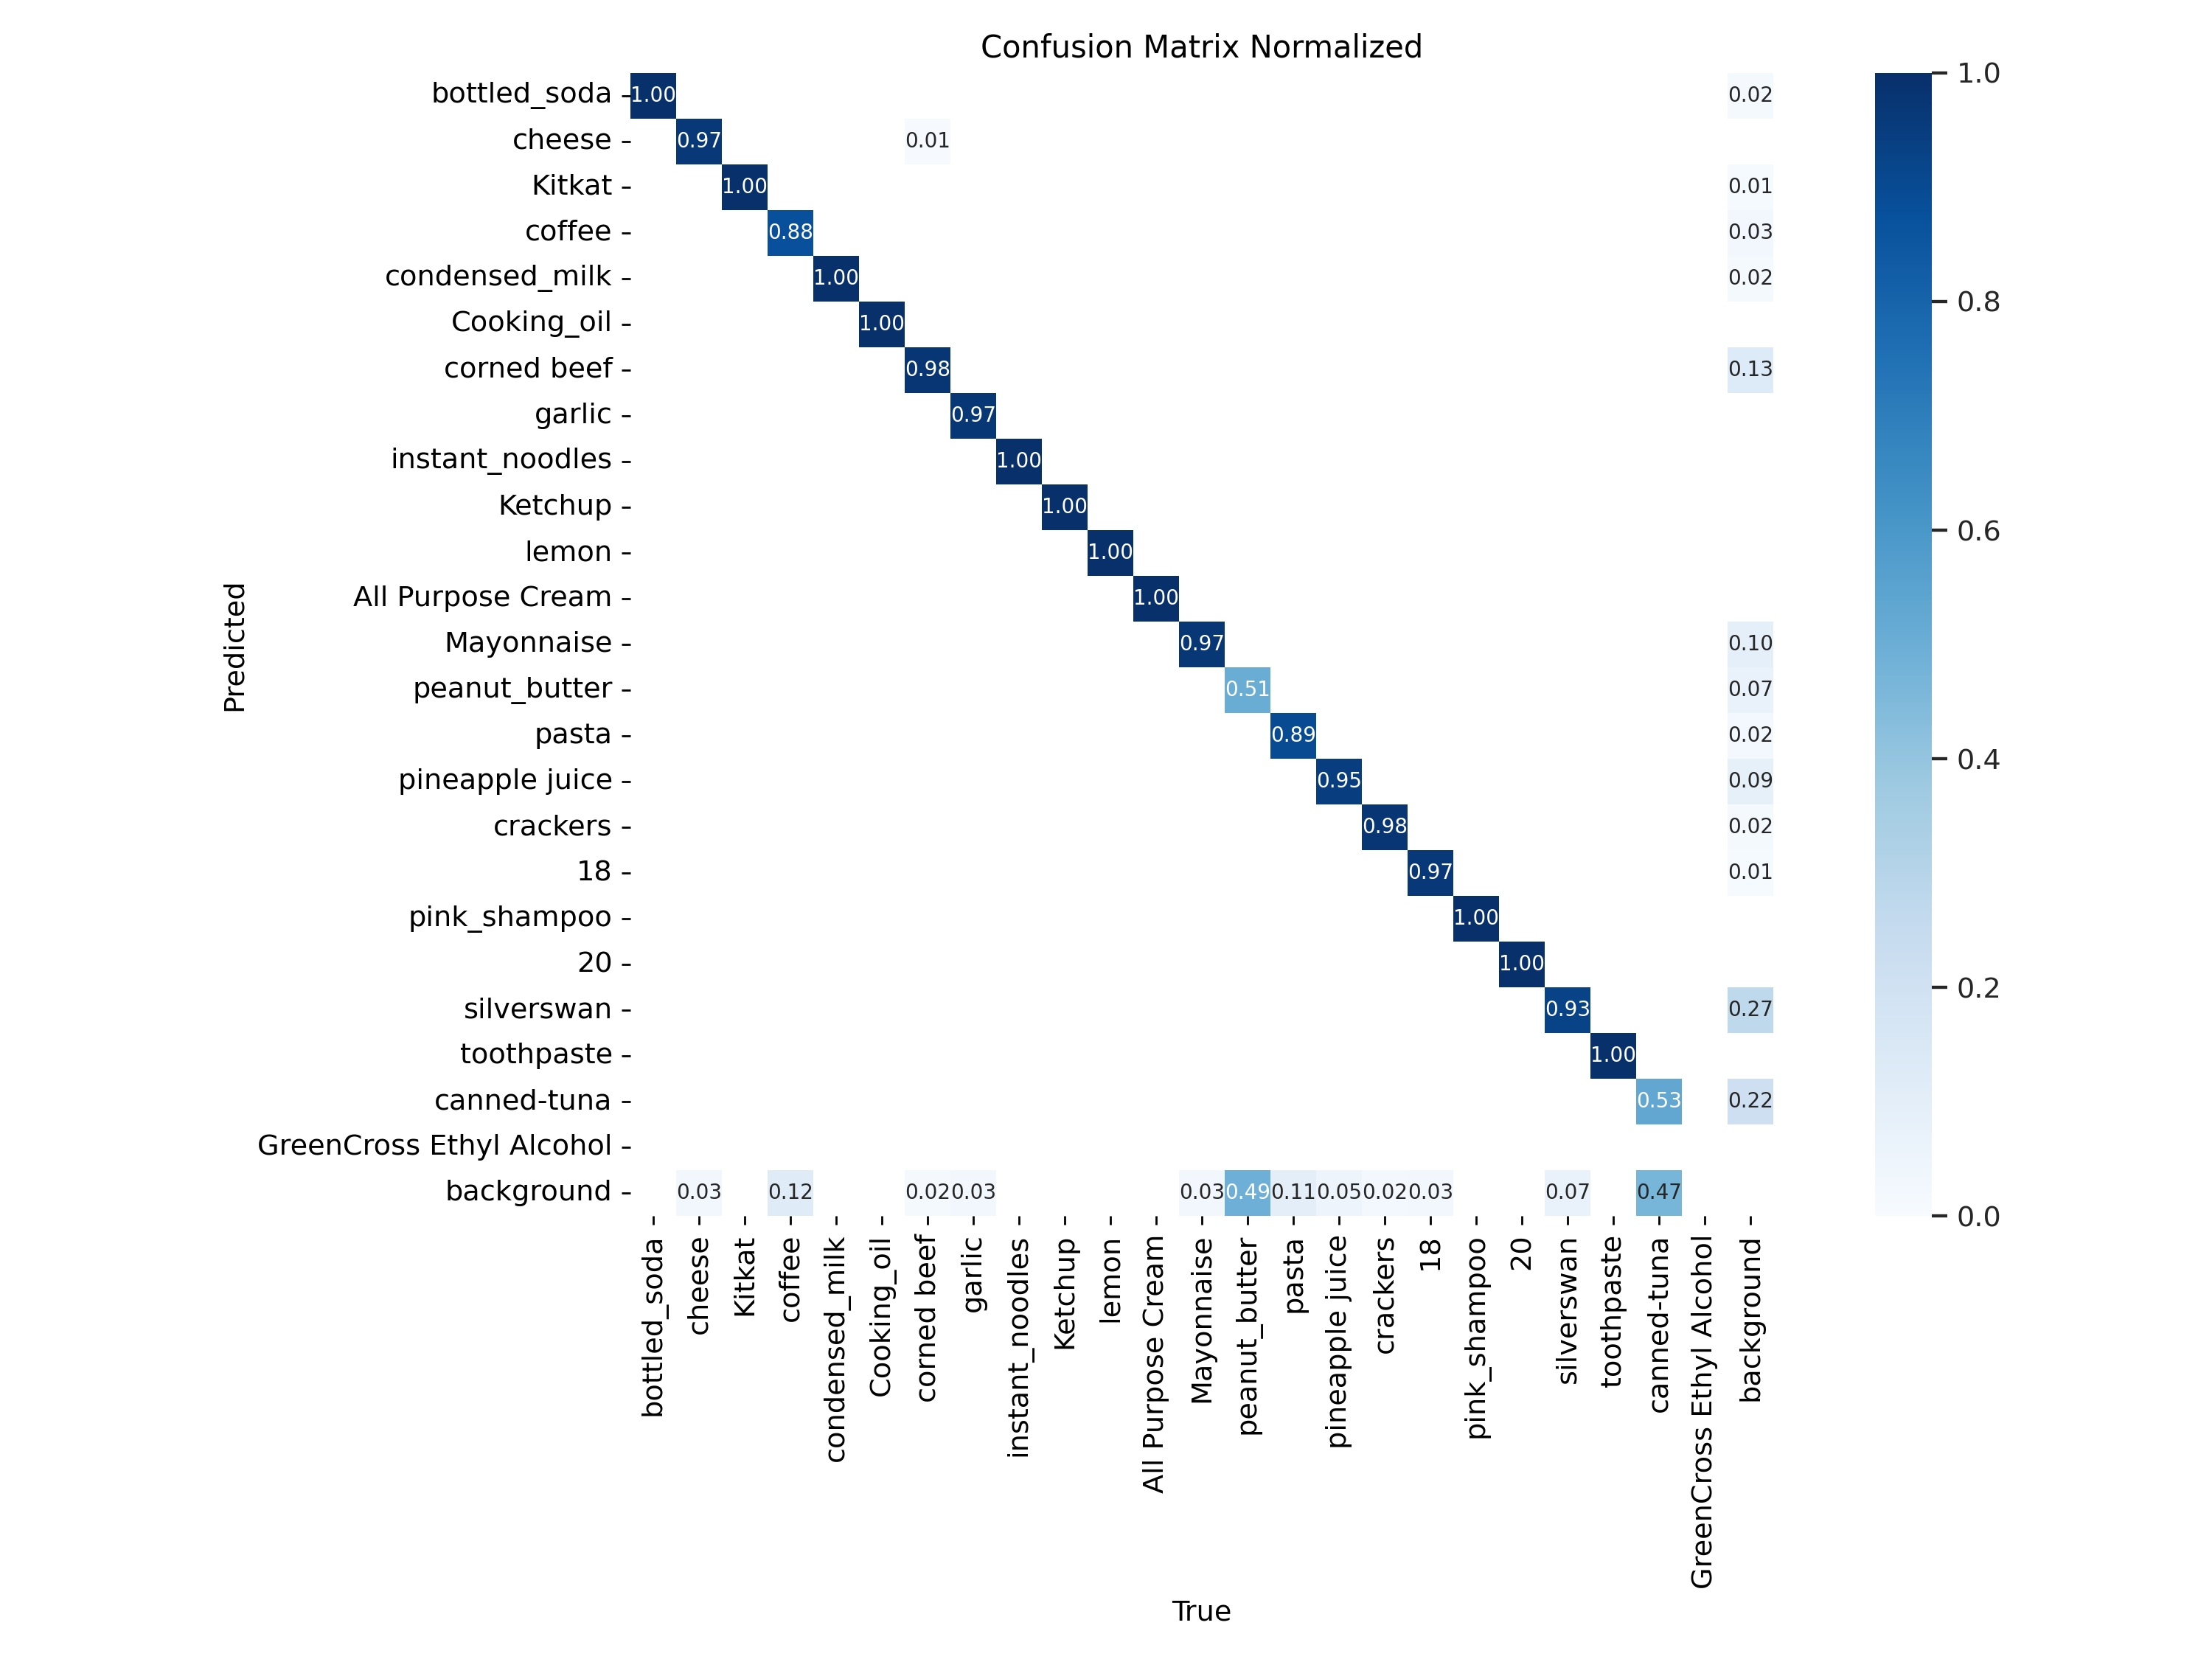

In [ ]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

# Trial 2

Use YOLO v11 Nano.

In [2]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
# model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="config.yaml", epochs=100, imgsz=640)


100%|██████████| 5.90M/5.90M [00:00<00:00, 108MB/s]

New https://pypi.org/project/ultralytics/8.3.33 available 😃 Update with 'pip install -U ultralytics'


Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/labels/train.cache... 7604 images, 0 backgrounds, 360 corrupt: 100%|██████████| 7604/7604 [00:00<?, ?it/s]

train: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/train/030178.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.06562]
train: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/train/040246.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.038126  1.1077061]
train: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/train/070019.jpg: ignoring corrupt image/label: negative label values [-0.0085792]
train: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/train/070021.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.000813]
train: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/train/070022.jpg: ignoring corrupt image/label: negative label values [-0.0170135  -0.01406075]
train: WARNING ⚠️ /raid/students/juan/train/grocery-


val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/labels/val.cache... 845 images, 0 backgrounds, 39 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]

val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070049.jpg: ignoring corrupt image/label: negative label values [-0.0024665]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070056.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.001284]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0047395]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070064.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0024115]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070070.jpg: ignoring corrupt image/label: negative label values [-0.0107671]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/0

Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.23G     0.7586      2.314      3.796      1.053         43        640: 100%|██████████| 453/453 [00:57<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.54it/s]


                   all        806       1758      0.439      0.416       0.38      0.324      0.424      0.404      0.358      0.299

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.24G     0.7931       2.05      2.226      1.043         34        640: 100%|██████████| 453/453 [00:52<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.70it/s]


                   all        806       1758      0.719      0.712      0.757      0.617      0.703      0.697      0.734      0.584

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.28G     0.8656        2.2      1.868      1.068         47        640: 100%|██████████| 453/453 [00:51<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.98it/s]

                   all        806       1758      0.691      0.576      0.653      0.501      0.666      0.563       0.62      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.22G     0.9166      2.239       1.79      1.091         55        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.91it/s]


                   all        806       1758      0.774      0.615       0.71       0.56      0.765      0.603      0.686      0.521

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.31G     0.8736      2.216      1.539      1.065         38        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.96it/s]


                   all        806       1758       0.76      0.665      0.724      0.571      0.747      0.629      0.683      0.514

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.31G       0.82       2.12      1.328       1.04         37        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.04it/s]

                   all        806       1758      0.872      0.785      0.855      0.713       0.85      0.766      0.824       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.22G     0.8024      2.086      1.201      1.031         66        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.03it/s]

                   all        806       1758      0.876      0.763      0.837      0.693      0.869       0.75      0.814      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.24G     0.7597      1.955       1.07       1.01         60        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.05it/s]

                   all        806       1758      0.873      0.824      0.875      0.739      0.861      0.811      0.847      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.24G     0.7341      1.971     0.9695     0.9966        117        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.07it/s]

                   all        806       1758      0.881      0.807      0.865      0.732      0.867      0.795      0.839      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.23G     0.7264      1.912     0.9182     0.9926         48        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.15it/s]

                   all        806       1758      0.903      0.845      0.887      0.762      0.902      0.827      0.865      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.26G     0.7091      1.905     0.8775     0.9884         35        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.10it/s]

                   all        806       1758      0.903      0.849      0.894      0.776      0.889      0.831      0.864      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.27G     0.6915      1.844     0.8203     0.9823         36        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.15it/s]

                   all        806       1758      0.928      0.848      0.897      0.773      0.917       0.84      0.878      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.24G     0.6871      1.843     0.8012     0.9804         45        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.16it/s]

                   all        806       1758       0.91      0.824      0.887      0.772      0.899      0.815      0.867      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.28G     0.6749      1.819      0.764     0.9746         59        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.15it/s]

                   all        806       1758      0.904      0.872      0.904      0.779      0.887      0.858      0.877      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.29G     0.6619      1.801     0.7304      0.967         88        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.16it/s]

                   all        806       1758      0.925      0.863      0.905      0.794      0.915      0.854      0.885      0.748



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.33G     0.6506       1.78     0.7085     0.9596         56        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.17it/s]

                   all        806       1758      0.912       0.88      0.914      0.805      0.902      0.871      0.894      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.25G     0.6429      1.709     0.6916     0.9565         28        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.19it/s]

                   all        806       1758      0.928      0.882      0.911      0.805      0.922      0.868      0.892      0.756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.25G      0.635      1.702     0.6822     0.9564         40        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.18it/s]

                   all        806       1758      0.941      0.877      0.909      0.806      0.936      0.872      0.895      0.765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.19G     0.6308      1.705     0.6617     0.9539         49        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.18it/s]

                   all        806       1758      0.939      0.883      0.921      0.819      0.931      0.872      0.904      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.3G     0.6264      1.697     0.6645     0.9547        147        640: 100%|██████████| 453/453 [00:50<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.17it/s]

                   all        806       1758      0.938      0.891       0.92      0.818      0.926       0.88      0.899      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.22G     0.6245      1.671     0.6457     0.9551         49        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.18it/s]

                   all        806       1758      0.943      0.885       0.92       0.82      0.928      0.873      0.899       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.28G     0.6131      1.673     0.6274     0.9474         50        640: 100%|██████████| 453/453 [00:50<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.19it/s]

                   all        806       1758      0.935      0.891      0.918      0.816      0.929      0.883      0.901      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.23G     0.6096      1.665     0.6223     0.9452         83        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.19it/s]

                   all        806       1758      0.937      0.895      0.918      0.821      0.931      0.885      0.902      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.19G     0.6102      1.656      0.606     0.9442         46        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758       0.94      0.888      0.922       0.83      0.933      0.865        0.9       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.24G     0.5965      1.633      0.591     0.9436         49        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.944      0.894      0.925      0.832      0.926      0.879      0.899      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.29G     0.5951      1.606     0.5814     0.9391         41        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.948      0.906      0.927      0.833      0.939      0.889      0.905      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.23G     0.6021      1.659     0.5758     0.9395         44        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.18it/s]

                   all        806       1758      0.945      0.902      0.929      0.833      0.931      0.888      0.908      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.29G     0.5838      1.618     0.5681     0.9321         60        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.953      0.895      0.929      0.841      0.943      0.886      0.912      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.33G     0.5913      1.605     0.5647     0.9376         42        640: 100%|██████████| 453/453 [00:50<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]

                   all        806       1758      0.958      0.906       0.93      0.842      0.946      0.895      0.913      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.34G     0.5755      1.581     0.5484     0.9267         48        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.952      0.899      0.932      0.847      0.943      0.891      0.916      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.25G     0.5742      1.573     0.5493      0.929        112        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.97it/s]

                   all        806       1758      0.957      0.902      0.928      0.842      0.949      0.894      0.915      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.23G     0.5735      1.594     0.5399     0.9292         35        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.945      0.904      0.927      0.834      0.936      0.895      0.907      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.26G     0.5665      1.543     0.5326     0.9265         40        640: 100%|██████████| 453/453 [00:50<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.952      0.898      0.926      0.839      0.943       0.89      0.911      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.27G     0.5682      1.562     0.5288     0.9253         99        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.962      0.899      0.934      0.849      0.954      0.892       0.92      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.32G     0.5601      1.573     0.5202      0.921         66        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.957        0.9      0.931      0.848       0.95      0.895      0.917      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.17G     0.5606      1.546     0.5119     0.9212         37        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.959      0.902       0.93      0.849      0.952      0.894      0.918      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.23G     0.5511      1.515     0.5025     0.9194         44        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758      0.956       0.91      0.933      0.851      0.948      0.901      0.917      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.24G     0.5518      1.511     0.5091     0.9204         59        640: 100%|██████████| 453/453 [00:50<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.956      0.915      0.932      0.853      0.949      0.908      0.919      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.26G     0.5461      1.511     0.4968     0.9168         39        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758       0.95      0.909      0.931      0.849      0.943      0.903      0.916      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.28G     0.5446      1.517     0.4981     0.9162         55        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758       0.96       0.91      0.933      0.853       0.95      0.901      0.914      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.28G       0.54      1.478     0.4863     0.9132         49        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758      0.956      0.917      0.933      0.856      0.945      0.908      0.917      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.36G     0.5437      1.491     0.4924     0.9173         61        640: 100%|██████████| 453/453 [00:50<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.15it/s]

                   all        806       1758      0.963      0.916      0.935      0.858      0.957       0.91      0.921      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.18G     0.5368      1.482     0.4836     0.9114         47        640: 100%|██████████| 453/453 [00:50<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.08it/s]

                   all        806       1758      0.952      0.915      0.934      0.858      0.945      0.908       0.92      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.24G     0.5362      1.483       0.48     0.9137         64        640: 100%|██████████| 453/453 [00:51<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.12it/s]

                   all        806       1758      0.958      0.916      0.935      0.857      0.954      0.907      0.921      0.818



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.25G     0.5343      1.471     0.4768      0.913         27        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.20it/s]

                   all        806       1758      0.955      0.915      0.936      0.863      0.958        0.9      0.921      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.22G     0.5298      1.443     0.4684     0.9118         40        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.961      0.917      0.936       0.86      0.956      0.911      0.922      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.26G     0.5236      1.463     0.4654     0.9078         55        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.955      0.921      0.932      0.859      0.948       0.91      0.916      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.29G      0.531      1.478     0.4655     0.9117         49        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.20it/s]

                   all        806       1758      0.966      0.915      0.938      0.866       0.96      0.908      0.923      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.23G     0.5292      1.457     0.4665     0.9129         65        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.965      0.915      0.936      0.865      0.958      0.911      0.921      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.25G     0.5263      1.438     0.4624     0.9076        101        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.965       0.91      0.935      0.868      0.958      0.904      0.921      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.28G     0.5177      1.495     0.4545      0.908         41        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758       0.96      0.921      0.937      0.867      0.958      0.909      0.923      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.2G     0.5183       1.42     0.4484     0.9073         47        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.97it/s]

                   all        806       1758       0.96      0.921      0.938      0.869      0.952       0.91      0.922      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.2G     0.5117      1.383     0.4455     0.9036         67        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.967      0.914      0.938      0.869      0.957      0.908      0.922      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.28G     0.5115      1.426      0.448     0.9052         51        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.98it/s]

                   all        806       1758      0.965      0.918      0.938      0.874       0.96      0.911      0.925       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.26G     0.5102      1.431     0.4363     0.9025         44        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.60it/s]

                   all        806       1758      0.965      0.922      0.941      0.873      0.958      0.915      0.925      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.26G     0.5108      1.401     0.4361     0.9057         62        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.954      0.921      0.937      0.873      0.946      0.913      0.922      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.27G      0.505      1.416     0.4365     0.9018         31        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.965      0.916       0.94      0.872      0.959      0.909      0.926      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.22G     0.5001      1.374     0.4271     0.9001         50        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758      0.967      0.916      0.939      0.875      0.962       0.91      0.926      0.836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.23G     0.5018      1.415       0.43     0.9001         59        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.954      0.919      0.937      0.873      0.948      0.911      0.921       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.26G     0.4992      1.373     0.4216     0.9005         48        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.965      0.922      0.941      0.876      0.956      0.915      0.925      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.27G     0.4958      1.339     0.4174     0.9003         39        640: 100%|██████████| 453/453 [00:50<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.964      0.921       0.94      0.876      0.958      0.913      0.928      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100       3.2G     0.4992      1.381     0.4196     0.8988         26        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.26it/s]

                   all        806       1758      0.963      0.922       0.94      0.876      0.958      0.916      0.928      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.27G      0.491      1.366     0.4162     0.8963         37        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.96it/s]

                   all        806       1758      0.969      0.916       0.94      0.879       0.96      0.908      0.925      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.19G     0.4865      1.351     0.4141     0.8976         34        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.26it/s]

                   all        806       1758      0.971       0.92      0.941      0.877      0.965      0.915      0.929      0.839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.24G     0.4883      1.367     0.4079      0.897         47        640: 100%|██████████| 453/453 [00:50<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.969      0.923      0.942      0.881       0.96      0.916      0.929      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.32G     0.4856      1.343     0.4061     0.8941         44        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758       0.97      0.923      0.944      0.881      0.962      0.916      0.929      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.21G     0.4793      1.301     0.3992     0.8909         50        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.961      0.926      0.943      0.881      0.957      0.917       0.93      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.23G     0.4883      1.374     0.3986     0.8939         46        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758      0.969      0.926      0.944      0.884      0.961      0.917      0.927      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.23G     0.4842      1.344     0.4006     0.8945         41        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.964      0.926      0.942      0.882      0.958      0.917      0.927      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.23G     0.4812      1.303     0.3962     0.8929         51        640: 100%|██████████| 453/453 [00:50<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.967      0.927      0.942      0.882      0.957      0.918      0.929      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.26G     0.4784      1.343     0.3925     0.8911         46        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.967      0.924      0.942      0.881      0.959      0.917      0.926      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.26G     0.4823      1.335     0.3945     0.8937         81        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.973      0.922      0.944      0.884      0.967      0.915      0.929      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.23G     0.4682      1.343     0.3902     0.8866         59        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.969      0.919      0.944      0.883      0.962      0.913       0.93      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100       3.2G     0.4701      1.287     0.3838     0.8877         45        640: 100%|██████████| 453/453 [00:50<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.965       0.93      0.944      0.885      0.957      0.923       0.93      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.32G     0.4716      1.302     0.3801     0.8901         68        640: 100%|██████████| 453/453 [00:50<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.19it/s]

                   all        806       1758      0.969      0.929      0.944      0.884      0.961      0.922      0.929      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.32G     0.4701      1.321     0.3816     0.8866         63        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.969      0.925      0.945      0.886      0.963      0.917      0.929      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.32G     0.4654      1.282      0.374     0.8884         73        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.969      0.925      0.945      0.887      0.962      0.917      0.931      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.25G     0.4642      1.296     0.3735     0.8847         39        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758       0.97      0.928      0.945      0.886      0.963      0.921       0.93      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.19G     0.4608      1.256     0.3698     0.8854         56        640: 100%|██████████| 453/453 [00:50<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758      0.969      0.926      0.945      0.886      0.961      0.919      0.929      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100       3.3G     0.4558      1.285     0.3656     0.8826         36        640: 100%|██████████| 453/453 [00:50<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.968      0.928      0.945      0.887       0.96      0.918      0.929      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.28G     0.4639      1.267     0.3729     0.8844         74        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        806       1758      0.971      0.926      0.945      0.885      0.964      0.918      0.931      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.28G     0.4548      1.247     0.3628     0.8833         38        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.00it/s]

                   all        806       1758       0.97      0.925      0.946      0.888      0.966      0.913      0.929      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.27G     0.4509      1.256     0.3638     0.8826         44        640: 100%|██████████| 453/453 [00:50<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.968      0.928      0.947      0.889      0.964      0.918      0.932       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.19G     0.4553      1.261     0.3659     0.8833         68        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.99it/s]

                   all        806       1758      0.964      0.931      0.947       0.89      0.957      0.924      0.932       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.27G     0.4496      1.235     0.3582     0.8845         38        640: 100%|██████████| 453/453 [00:50<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758      0.967      0.931      0.947      0.892      0.968       0.92      0.933       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.27G     0.4467      1.239     0.3544     0.8805         55        640: 100%|██████████| 453/453 [00:50<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.17it/s]

                   all        806       1758      0.968      0.932      0.947      0.889      0.971      0.919      0.932      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.31G     0.4506      1.246     0.3533     0.8811         65        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.22it/s]

                   all        806       1758      0.976      0.925      0.947      0.889      0.969      0.919      0.931      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.23G     0.4434      1.239     0.3462     0.8773         49        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.976      0.924      0.946       0.89      0.967      0.916      0.929      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.19G     0.4431      1.241     0.3482     0.8785         92        640: 100%|██████████| 453/453 [00:50<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.966      0.931      0.946      0.889      0.967      0.919      0.932      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.14G     0.4446      1.238     0.3465     0.8767         50        640: 100%|██████████| 453/453 [00:50<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.971      0.927      0.947       0.89      0.968      0.916      0.931      0.851


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.18G     0.3805      1.119     0.2741     0.8394         72        640: 100%|██████████| 453/453 [00:52<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.12it/s]

                   all        806       1758      0.969      0.929      0.945      0.888       0.97      0.915      0.931      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.16G     0.3738      1.073     0.2649     0.8391         17        640: 100%|██████████| 453/453 [00:50<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.15it/s]

                   all        806       1758      0.969      0.931      0.946      0.888      0.967      0.918       0.93       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.18G     0.3702      1.067     0.2598     0.8348         14        640: 100%|██████████| 453/453 [00:50<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.10it/s]

                   all        806       1758      0.972      0.931      0.947      0.888      0.964       0.92       0.93      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.17G     0.3684      1.056     0.2563     0.8365         18        640: 100%|██████████| 453/453 [00:51<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.21it/s]

                   all        806       1758      0.973       0.93      0.947      0.888      0.965       0.92       0.93       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.16G     0.3655      1.035      0.256     0.8339         47        640: 100%|██████████| 453/453 [00:51<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.18it/s]

                   all        806       1758      0.974       0.93      0.947      0.888      0.965       0.92       0.93      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.16G     0.3629      1.028     0.2523     0.8317         14        640: 100%|██████████| 453/453 [00:50<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.19it/s]

                   all        806       1758      0.974       0.93      0.947       0.89      0.965       0.92       0.93      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.17G     0.3621       1.05     0.2515      0.832         23        640: 100%|██████████| 453/453 [00:50<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        806       1758      0.974      0.929      0.947      0.888      0.963       0.92      0.929       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.15G     0.3601      1.015     0.2471     0.8312         24        640: 100%|██████████| 453/453 [00:51<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        806       1758      0.973       0.93      0.947      0.889      0.964      0.921       0.93      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.16G     0.3547      1.003     0.2444     0.8293         33        640: 100%|██████████| 453/453 [00:50<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.19it/s]

                   all        806       1758      0.974      0.928      0.947      0.888      0.965       0.92      0.931       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.17G     0.3526     0.9968      0.243     0.8286         16        640: 100%|██████████| 453/453 [00:50<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.18it/s]

                   all        806       1758      0.973      0.928      0.947      0.889      0.963      0.921      0.931       0.85



100 epochs completed in 1.539 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.0MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.82it/s]


                   all        806       1758      0.968      0.931      0.947      0.891      0.968       0.92      0.933       0.85
          bottled_soda         37         37      0.987          1      0.995      0.935      0.992          1      0.995      0.921
                cheese         40         58      0.991      0.966      0.972      0.923      0.995      0.966      0.972        0.9
                Kitkat         42         47          1      0.974      0.981      0.923          1      0.965      0.981      0.895
                coffee         30         66      0.988      0.955      0.974      0.908          1      0.939      0.967      0.902
        condensed_milk         37         52      0.956          1      0.994      0.968       0.96          1      0.994      0.949
           Cooking_oil         40         40       0.99          1      0.995      0.939      0.993          1      0.995       0.92
           corned beef         36        179      0.959      0.978   

In [3]:
!yolo task=segment mode=val model=runs/segment/train2/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070049.jpg: ignoring corrupt image/label: negative label values [-0.0024665]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070056.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.001284]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0047395]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070064.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0024115

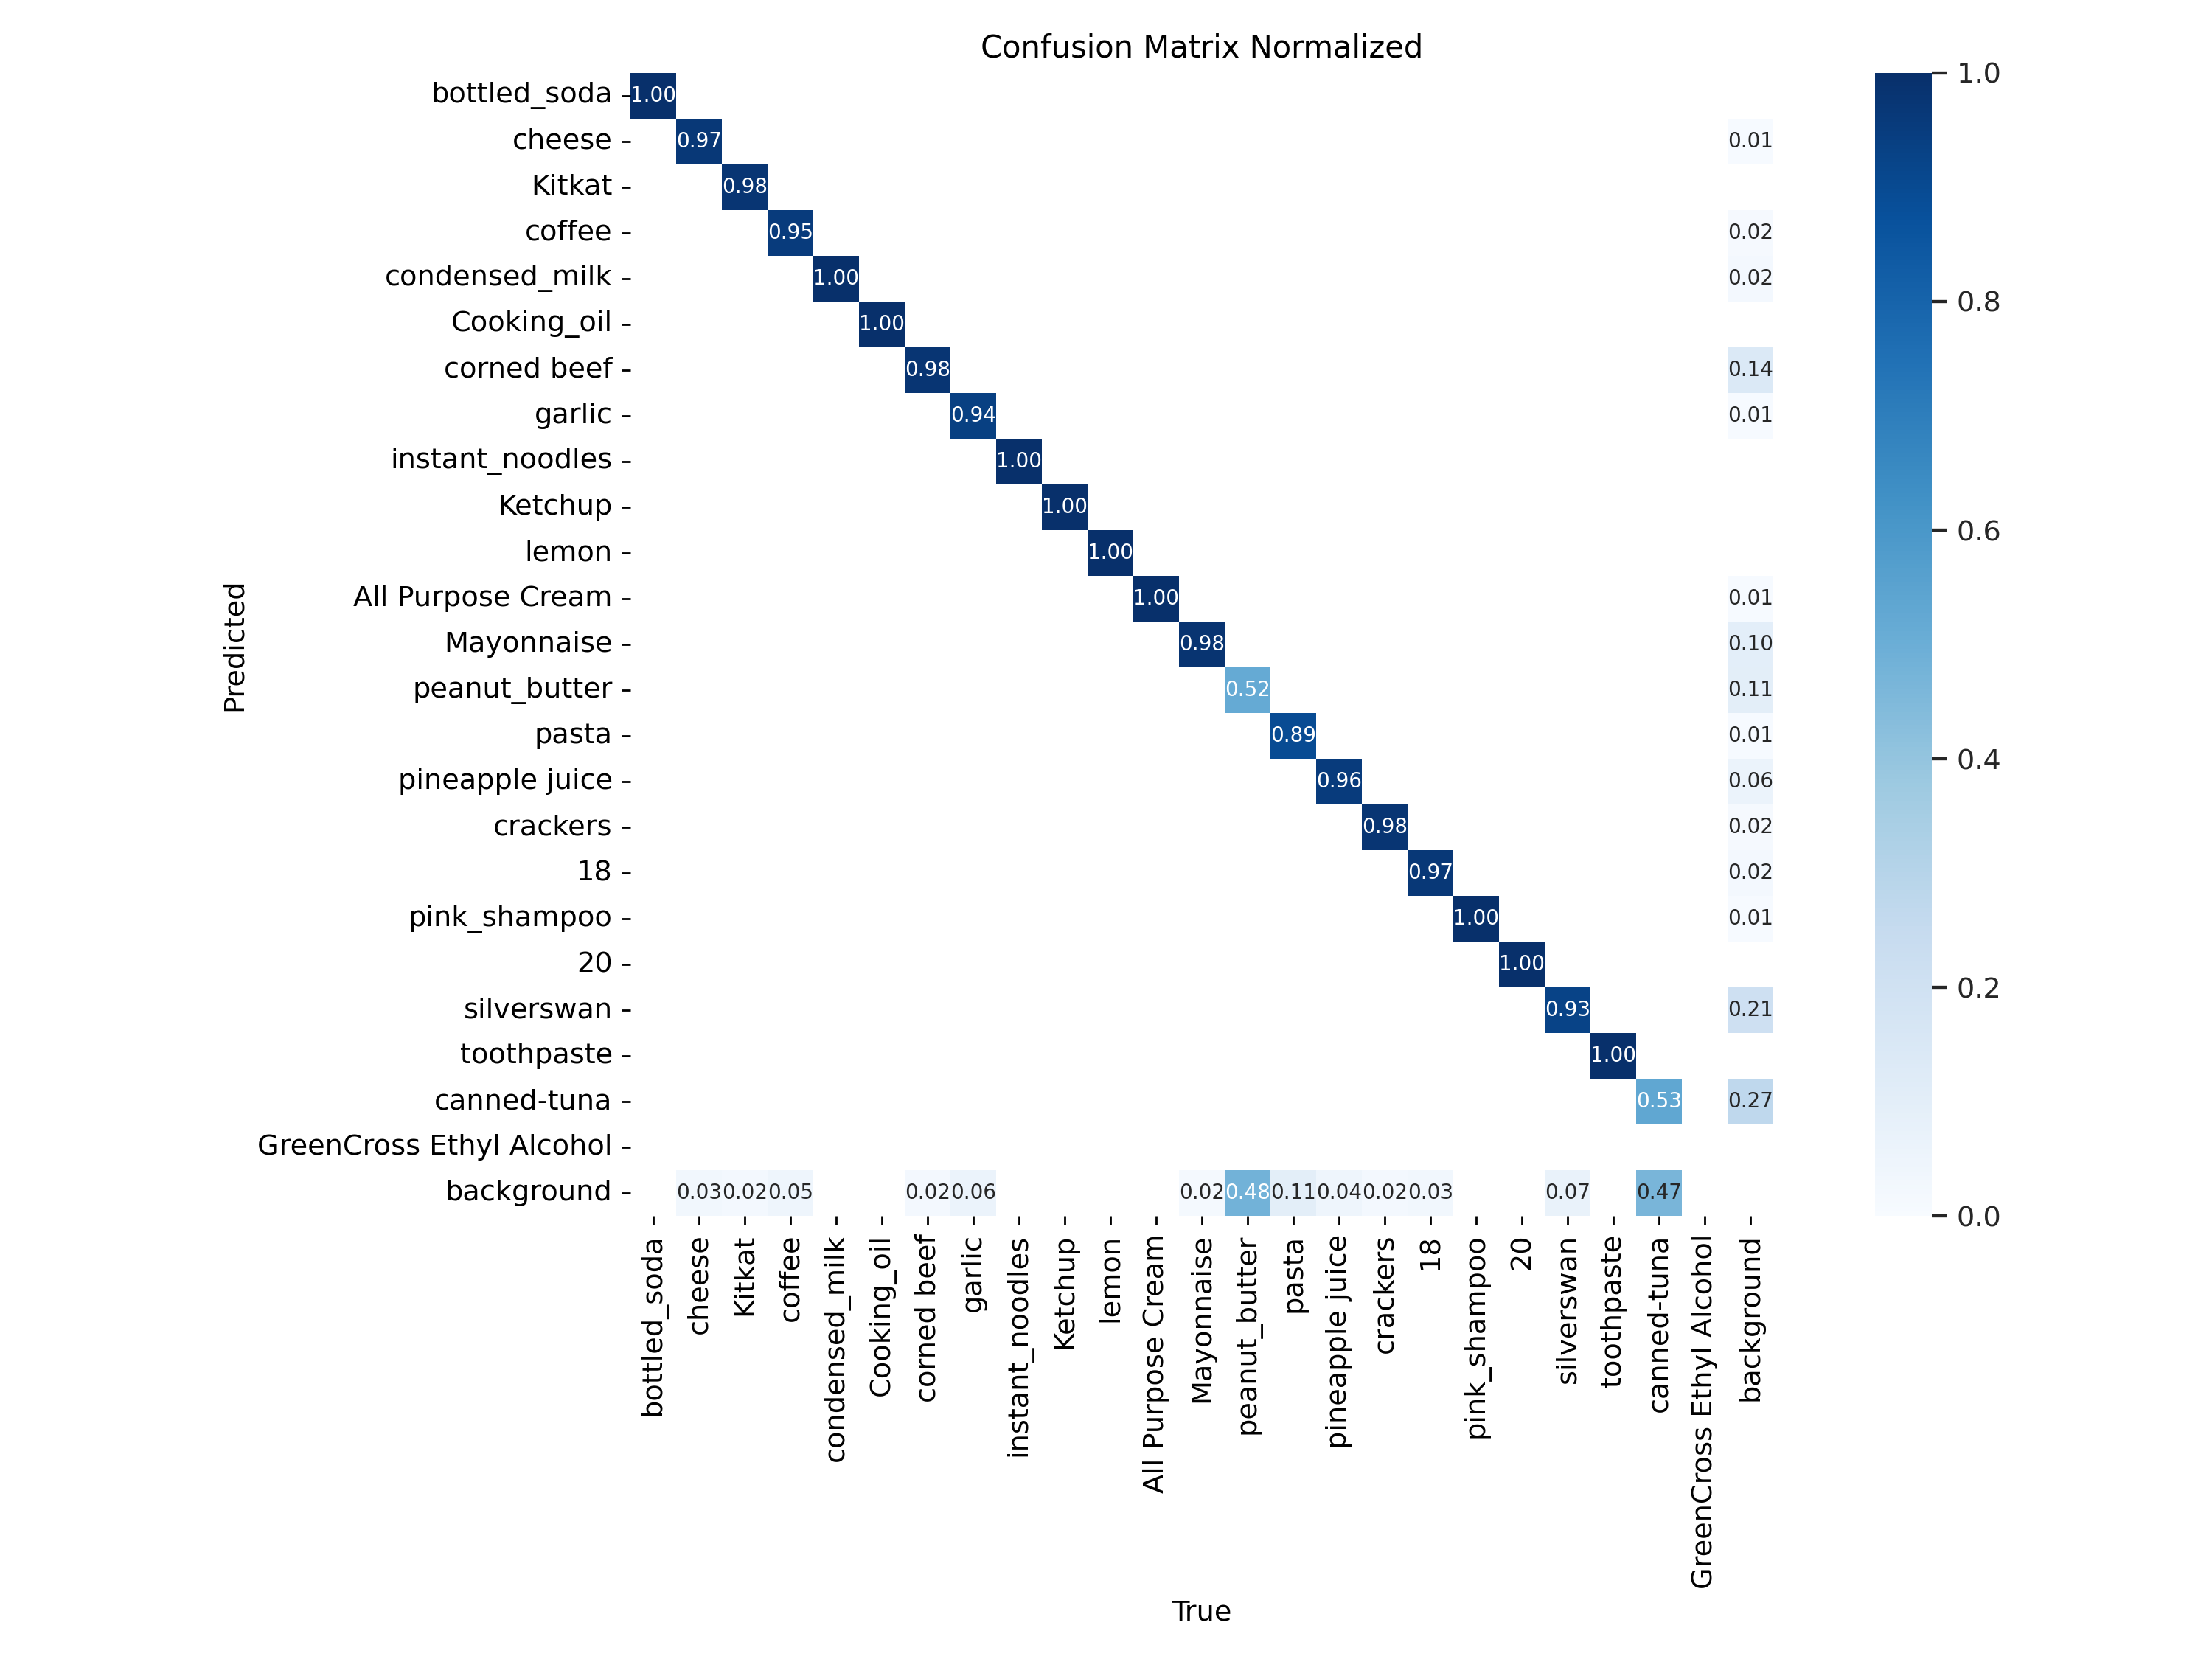

In [4]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val2/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

It seems that despite using an upgraded model, there is only a marginal improvement in the model's performance on the most difficult classes to classify.